<div align = 'center'>
    <font size=20> 钱院学辅--计学组联合开展 </font>
<div/>
        
<table rules="none" align="center">
		<td>
			<center>
				<img src="img/logo2.png" width="100%" />
			</center>
		</td>
		<td>
			<center>
				<img src="img/logo.png" width="100%" />
			</center>
		</td>
</table>


# <center> 第四次讨论课 </center>
# <center>支持向量机</center>


回顾一下感知机：\
**定义（感知机）**　假设输入空间（特征空间）是$X \subseteq R^n$，输出空间是 Y＝{+1,-1}。输入$x \in X$表示实例的特征向量，对应于输入空间（特征空间）的点；输出$y \in Y$表示实例的类别。由输入空间到输出空间的如下函数:
<center>$f(x) = sign(w\cdot x+b)$</center>
    
称为感知机

问题：\
感知机学习算法存在许多解，这些解既依赖于初值的选择，也依赖于迭代过程中误分类点的选择顺序。\
而当训练集线性不可分时，感知机学习算法不收敛，迭代结果会发生震荡。\
**如何选择最好的分离超平面？**

![](img/perceptron_explain.png)
一个直观上的猜想是如果分离超平面离**所有数据点越远，就越不容易分类错误**

下面就来量化间隔大小：

**函数间隔**：<center> $\hat\gamma_i = y_i(w\cdot x_i + b)$<center/> 
<center> $\hat\gamma = \min\limits_{i=1,2...N} \hat\gamma_i$<center/>
    
取其中的最小值作为这一类样本的函数间隔\
函数间隔表示分类预测正确性的置信程度，绝对值越大越好
    
但将所有参数乘2，函数间隔翻倍，而超平面的实际位置没有改变，因此不妨令$||w|| = 1$，这时的函数间隔变成了真正意义上的几何间隔，描述了到超平面的距离(有正负)\
**几何间隔**：<center> $\gamma_i = y_i(\frac{w}{||w||}\cdot x_i + \frac{b}{||w||})$<center/> 
<center> $\gamma = \min\limits_{i=1,2...N} \gamma_i$<center/>   
    


## 硬间隔最大化

有上述间隔要求，我们的svm约束条件简化为：
<center> $\max\limits_{w,b}\ \frac{\hat\gamma}{||w||}$<center/>
<center> $s.t.\  y_i(w \cdot x_i+b) \geq \hat\gamma$
    
选择一个超平面与一个间隔，要求所有样本离超平面的距离不小于该间隔，同时希望间隔最大。
    
同时，注意到函数间隔只是一个距离的度量，实际乘以某常数也不影响优化的结果，那么不妨让$\hat\gamma = 1$，此时我们就只剩下w，b两个参数了。\
(我们实际上做的就是固定一个评价准则，这里完全可以固定$||w|| = 1$，然后让$\hat\gamma$最大，之所以不这么做是因为对模型参数做限制不利于学习参数)

## 硬间隔最大化

### 优化问题

$$\min _{w, b} \frac{1}{2}\|w\|^{2}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right)-1 \geqslant 0, \quad i=1,2, \cdots, N$$

求得最优化问题的解为$w^*$，$b^*$，得到线性可分支持向量机，分离超平面是

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数是

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

解的唯一性证明（easy）\
支持向量的定义


## 补充知识

### 拉格朗日乘子法，拉格朗日对偶

[见这篇专栏](https://zhuanlan.zhihu.com/p/440297403)\
[或者这篇](https://zhuanlan.zhihu.com/p/26514613)\
凸优化、拉格朗日对偶与KKT，看b站这个视频，非常清晰，BV1HP4y1Y79e,讨论课也是基于此讲的。

![](./img/lagrange.png)

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#加载鸢尾花数据集
iris = datasets.load_iris()
#花瓣长度，花瓣宽度
X = iris["data"][:, (2, 3)]  
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM分类器模型
svm_clf = SVC(kernel="linear", C=9999)
svm_clf.fit(X, y)

# 较差的模型
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 在决策边界, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

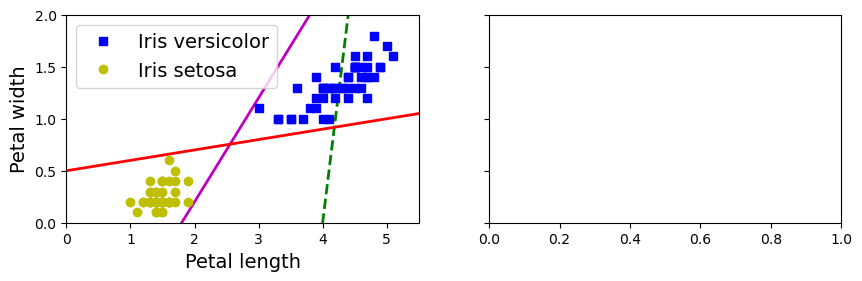

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

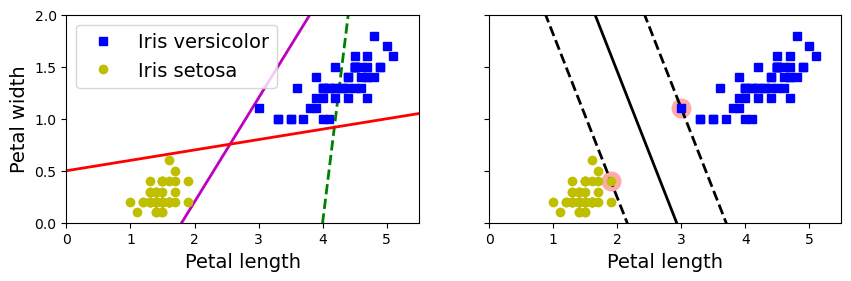

In [11]:
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

## 核方法(非线性支持向量机)

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间x到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意$\mathcal{X}$，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$

对称函数$K(x,z)$为正定核的充要条件如下：对任意$$\mathrm{x}_{\mathrm{i}} \in \mathcal{X}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}$$，任意正整数$m$，对称函数$K(x,z)$对应的Gram矩阵是半正定的。

所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$
